In [23]:
import numpy as np
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt

In [24]:
result_path = Path("./results/history.jsonl")
result_path.exists()

True

In [25]:
csv_path = Path("./results/history.csv")

# load data

In [26]:
raw_data = []
with open(result_path, "r") as f:
    for line in f:
        raw_data.append(json.loads(line))
len(raw_data)

142

In [27]:
raw_data[0]

{'camera0': {'cycle_results': {'0': {'image_timestamp': 'camera0--image--20241022-164126.156683--0',
    'box': [2487, 1357, 2815, 1685],
    'center': [2650.520561366848, 1520.453341924519],
    'radii': [63.416510929977804, 137.5135730269971],
    'distance': 1219.8209368826401,
    'exposure_time': 40000,
    'offset': [0, 0]},
   '1': {'image_timestamp': 'camera0--image--20241022-164126.156683--1',
    'box': [2069, 1368, 2397, 1696],
    'center': [2232.849052072566, 1531.8107584361383],
    'radii': [66.15953983677306, 136.7207770157494],
    'distance': 1226.8942522506884,
    'exposure_time': 40000,
    'offset': [0, 0]}},
  'pixel_move_result': {'0': [0, 0], '1': [0, 0]},
  'pixel_move_result_without_ref': {'0': [0, 0], '1': [0, 0]},
  'real_move_result': {'0': [0, 0], '1': [0, 0]},
  'real_move_result_without_ref': {'0': [0, 0], '1': [0, 0]}},
 'camera1': {'cycle_results': {'0': {'image_timestamp': 'camera0--image--20241022-164128.505893--0',
    'box': [1747, 1046, 2084, 138

In [28]:
camera0_pixel_move_results = []
camera0_pixel_move_results_without_ref = []
camera0_real_move_results = []
camera0_real_move_results_without_ref = []
camera0_is_temp_stable_results = []
camera0_times = []
for data in raw_data:
    camera0: dict = data["camera0"]

    pixel_move_result: dict = camera0["pixel_move_result"]
    pixel_move_result = dict(sorted(pixel_move_result.items(), key=lambda x: x[0]))
    camera0_pixel_move_results.append(
        [i for v in pixel_move_result.values() for i in v]
    )

    pixel_move_result_without_ref: dict = camera0["pixel_move_result_without_ref"]
    pixel_move_result_without_ref = dict(sorted(pixel_move_result_without_ref.items(), key=lambda x: x[0]))
    camera0_pixel_move_results_without_ref.append(
        [i for v in pixel_move_result_without_ref.values() for i in v]
    )

    real_move_result: dict = camera0["real_move_result"]
    real_move_result = dict(sorted(real_move_result.items(), key=lambda x: x[0]))
    camera0_real_move_results.append(
        [i for v in real_move_result.values() for i in v]
    )

    real_move_result_without_ref: dict = camera0["real_move_result_without_ref"]
    real_move_result_without_ref = dict(sorted(real_move_result_without_ref.items(), key=lambda x: x[0]))
    camera0_real_move_results_without_ref.append(
        [i for v in real_move_result_without_ref.values() for i in v]
    )

    is_temp_stable: bool = data["is_temp_stable"]
    camera0_is_temp_stable_results.append([is_temp_stable])

    time = data["time"]
    camera0_times.append([time])

In [29]:
concat_results = np.concatenate(
    (
        camera0_pixel_move_results,
        camera0_pixel_move_results_without_ref,
        camera0_real_move_results,
        camera0_real_move_results_without_ref,
        camera0_is_temp_stable_results,
    ),
    axis=1,
)
concat_results.shape

(142, 17)

In [30]:
df1 = pd.DataFrame(
    concat_results,
    columns=[
        "pixel_move_0_x",
        "pixel_move_0_y",
        "pixel_move_1_x",
        "pixel_move_1_y",
        "pixel_move_without_ref_0_x",
        "pixel_move_without_ref_0_y",
        "pixel_move_without_ref_1_x",
        "pixel_move_without_ref_1_y",
        "real_move_0_x",
        "real_move_0_y",
        "real_move_1_x",
        "real_move_1_y",
        "real_move_without_ref_0_x",
        "real_move_without_ref_0_y",
        "real_move_without_ref_1_x",
        "real_move_without_ref_1_y",
        "is_temp_stable",
    ],
)
df1.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
1,0.180109,-0.011404,0.081285,0.026168,0.180109,-0.011404,0.081285,0.026168,0.0426,-0.0027,0.0193,0.0062,0.0426,-0.0027,0.0193,0.0062,0.0
2,0.010628,0.126116,0.002440,0.391858,0.010628,0.126116,0.002440,0.391858,0.0025,0.0298,0.0006,0.0931,0.0025,0.0298,0.0006,0.0931,0.0
3,0.292553,0.017891,0.267559,-0.005958,0.292553,0.017891,0.267559,-0.005958,0.0691,0.0042,0.0636,-0.0014,0.0691,0.0042,0.0636,-0.0014,0.0
4,0.077341,0.074310,0.225141,0.305235,0.077341,0.074310,0.225141,0.305235,0.0183,0.0176,0.0535,0.0726,0.0183,0.0176,0.0535,0.0726,0.0


In [31]:
df1.to_csv(csv_path)

In [32]:
df2 = pd.DataFrame(camera0_times, columns=['time'])
df2.head()

,time
0,2024-10-22 16:41:30
1,2024-10-22 16:41:36
2,2024-10-22 16:41:49
3,2024-10-22 16:42:03
4,2024-10-22 16:42:18


In [33]:
df = pd.concat([df1, df2], axis=1)
df.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable,time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2024-10-22 16:41:30
1,0.180109,-0.011404,0.081285,0.026168,0.180109,-0.011404,0.081285,0.026168,0.0426,-0.0027,0.0193,0.0062,0.0426,-0.0027,0.0193,0.0062,0.0,2024-10-22 16:41:36
2,0.010628,0.126116,0.002440,0.391858,0.010628,0.126116,0.002440,0.391858,0.0025,0.0298,0.0006,0.0931,0.0025,0.0298,0.0006,0.0931,0.0,2024-10-22 16:41:49
3,0.292553,0.017891,0.267559,-0.005958,0.292553,0.017891,0.267559,-0.005958,0.0691,0.0042,0.0636,-0.0014,0.0691,0.0042,0.0636,-0.0014,0.0,2024-10-22 16:42:03
4,0.077341,0.074310,0.225141,0.305235,0.077341,0.074310,0.225141,0.305235,0.0183,0.0176,0.0535,0.0726,0.0183,0.0176,0.0535,0.0726,0.0,2024-10-22 16:42:18


In [34]:
df.describe()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.0
mean,14084.795051,14084.250982,0.247113,-0.081844,14084.795051,14084.250982,0.247113,-0.081844,14084.575113,14084.446526,0.058743,-0.019454,14084.575113,14084.446526,0.058743,-0.019454,0.0
std,118256.537878,118256.603137,0.145308,0.241872,118256.537878,118256.603137,0.145308,0.241872,118256.564259,118256.579682,0.034546,0.057499,118256.564259,118256.579682,0.034546,0.057499,0.0
min,0.000000,-0.731281,-0.019973,-0.717847,0.000000,-0.731281,-0.019973,-0.717847,0.000000,-0.172800,-0.004700,-0.170600,0.000000,-0.172800,-0.004700,-0.170600,0.0
25%,0.199994,-0.441227,0.135338,-0.264092,0.199994,-0.441227,0.135338,-0.264092,0.047300,-0.104300,0.032175,-0.062750,0.047300,-0.104300,0.032175,-0.062750,0.0
50%,0.297247,-0.198873,0.240527,-0.090017,0.297247,-0.198873,0.240527,-0.090017,0.070250,-0.047000,0.057200,-0.021400,0.070250,-0.047000,0.057200,-0.021400,0.0
75%,0.376223,-0.089518,0.334895,0.110320,0.376223,-0.089518,0.334895,0.110320,0.088925,-0.021175,0.079575,0.026250,0.088925,-0.021175,0.079575,0.026250,0.0
max,1000000.000000,1000000.000000,0.689412,0.393572,1000000.000000,1000000.000000,0.689412,0.393572,1000000.000000,1000000.000000,0.163900,0.093600,1000000.000000,1000000.000000,0.163900,0.093600,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pixel_move_0_x              142 non-null    float64
 1   pixel_move_0_y              142 non-null    float64
 2   pixel_move_1_x              142 non-null    float64
 3   pixel_move_1_y              142 non-null    float64
 4   pixel_move_without_ref_0_x  142 non-null    float64
 5   pixel_move_without_ref_0_y  142 non-null    float64
 6   pixel_move_without_ref_1_x  142 non-null    float64
 7   pixel_move_without_ref_1_y  142 non-null    float64
 8   real_move_0_x               142 non-null    float64
 9   real_move_0_y               142 non-null    float64
 10  real_move_1_x               142 non-null    float64
 11  real_move_1_y               142 non-null    float64
 12  real_move_without_ref_0_x   142 non-null    float64
 13  real_move_without_ref_0_y   142 non

In [36]:
df = df.where(df.iloc[:, :-1]<100000)
df.head()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable,time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,NaN
1,0.180109,-0.011404,0.081285,0.026168,0.180109,-0.011404,0.081285,0.026168,0.0426,-0.0027,0.0193,0.0062,0.0426,-0.0027,0.0193,0.0062,0.0,NaN
2,0.010628,0.126116,0.002440,0.391858,0.010628,0.126116,0.002440,0.391858,0.0025,0.0298,0.0006,0.0931,0.0025,0.0298,0.0006,0.0931,0.0,NaN
3,0.292553,0.017891,0.267559,-0.005958,0.292553,0.017891,0.267559,-0.005958,0.0691,0.0042,0.0636,-0.0014,0.0691,0.0042,0.0636,-0.0014,0.0,NaN
4,0.077341,0.074310,0.225141,0.305235,0.077341,0.074310,0.225141,0.305235,0.0183,0.0176,0.0535,0.0726,0.0183,0.0176,0.0535,0.0726,0.0,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pixel_move_0_x              140 non-null    float64
 1   pixel_move_0_y              140 non-null    float64
 2   pixel_move_1_x              142 non-null    float64
 3   pixel_move_1_y              142 non-null    float64
 4   pixel_move_without_ref_0_x  140 non-null    float64
 5   pixel_move_without_ref_0_y  140 non-null    float64
 6   pixel_move_without_ref_1_x  142 non-null    float64
 7   pixel_move_without_ref_1_y  142 non-null    float64
 8   real_move_0_x               140 non-null    float64
 9   real_move_0_y               140 non-null    float64
 10  real_move_1_x               142 non-null    float64
 11  real_move_1_y               142 non-null    float64
 12  real_move_without_ref_0_x   140 non-null    float64
 13  real_move_without_ref_0_y   140 non

In [38]:
df.describe()

,pixel_move_0_x,pixel_move_0_y,pixel_move_1_x,pixel_move_1_y,pixel_move_without_ref_0_x,pixel_move_without_ref_0_y,pixel_move_without_ref_1_x,pixel_move_without_ref_1_y,real_move_0_x,real_move_0_y,real_move_1_x,real_move_1_y,real_move_without_ref_0_x,real_move_without_ref_0_y,real_move_without_ref_1_x,real_move_without_ref_1_y,is_temp_stable
count,140.000000,140.000000,142.000000,142.000000,140.000000,140.000000,142.000000,142.000000,140.000000,140.000000,142.000000,142.000000,140.000000,140.000000,142.000000,142.000000,142.0
mean,0.292123,-0.259719,0.247113,-0.081844,0.292123,-0.259719,0.247113,-0.081844,0.069044,-0.061381,0.058743,-0.019454,0.069044,-0.061381,0.058743,-0.019454,0.0
std,0.121248,0.203244,0.145308,0.241872,0.121248,0.203244,0.145308,0.241872,0.028654,0.048031,0.034546,0.057499,0.028654,0.048031,0.034546,0.057499,0.0
min,0.000000,-0.731281,-0.019973,-0.717847,0.000000,-0.731281,-0.019973,-0.717847,0.000000,-0.172800,-0.004700,-0.170600,0.000000,-0.172800,-0.004700,-0.170600,0.0
25%,0.198069,-0.444742,0.135338,-0.264092,0.198069,-0.444742,0.135338,-0.264092,0.046825,-0.105125,0.032175,-0.062750,0.046825,-0.105125,0.032175,-0.062750,0.0
50%,0.295153,-0.201874,0.240527,-0.090017,0.295153,-0.201874,0.240527,-0.090017,0.069800,-0.047700,0.057200,-0.021400,0.069800,-0.047700,0.057200,-0.021400,0.0
75%,0.372637,-0.096487,0.334895,0.110320,0.372637,-0.096487,0.334895,0.110320,0.088100,-0.022825,0.079575,0.026250,0.088100,-0.022825,0.079575,0.026250,0.0
max,0.584386,0.134139,0.689412,0.393572,0.584386,0.134139,0.689412,0.393572,0.138100,0.031700,0.163900,0.093600,0.138100,0.031700,0.163900,0.093600,0.0


# draw

Text(0.5, 1.0, 'Pixel Move')

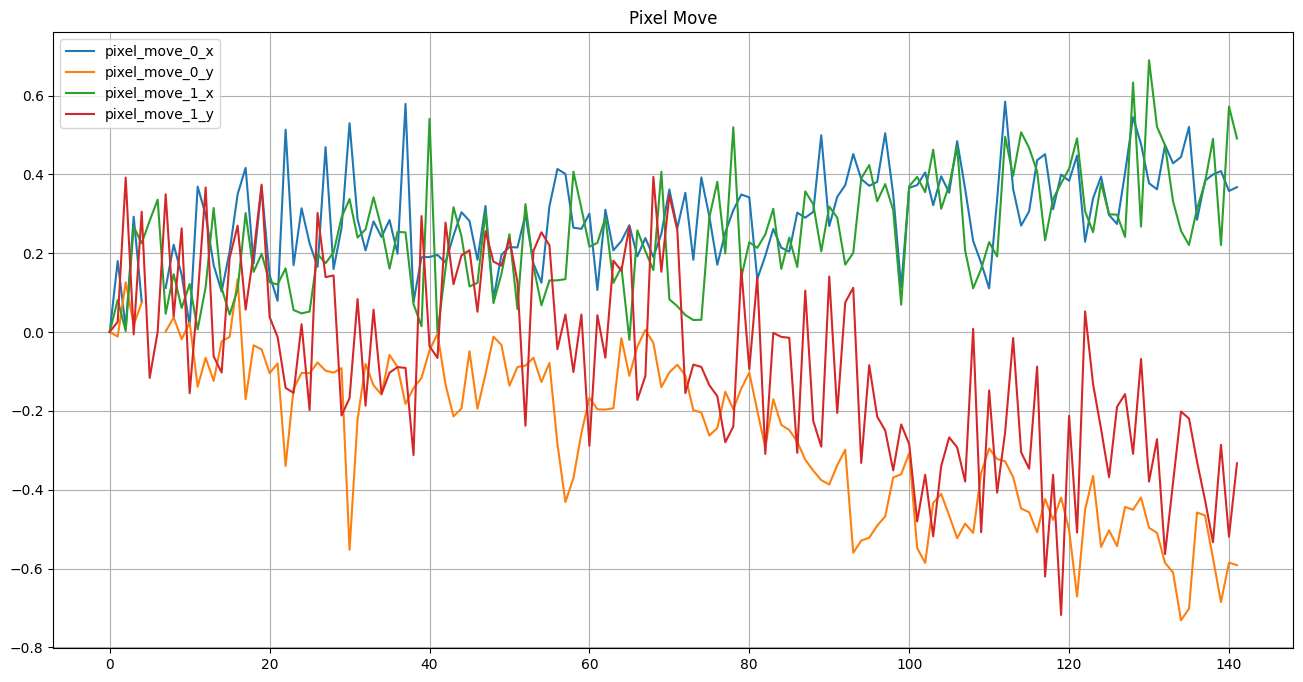

In [39]:
df[["pixel_move_0_x", "pixel_move_0_y", "pixel_move_1_x", "pixel_move_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Pixel Move")

Text(0.5, 1.0, 'Pixel Move Without Reference')

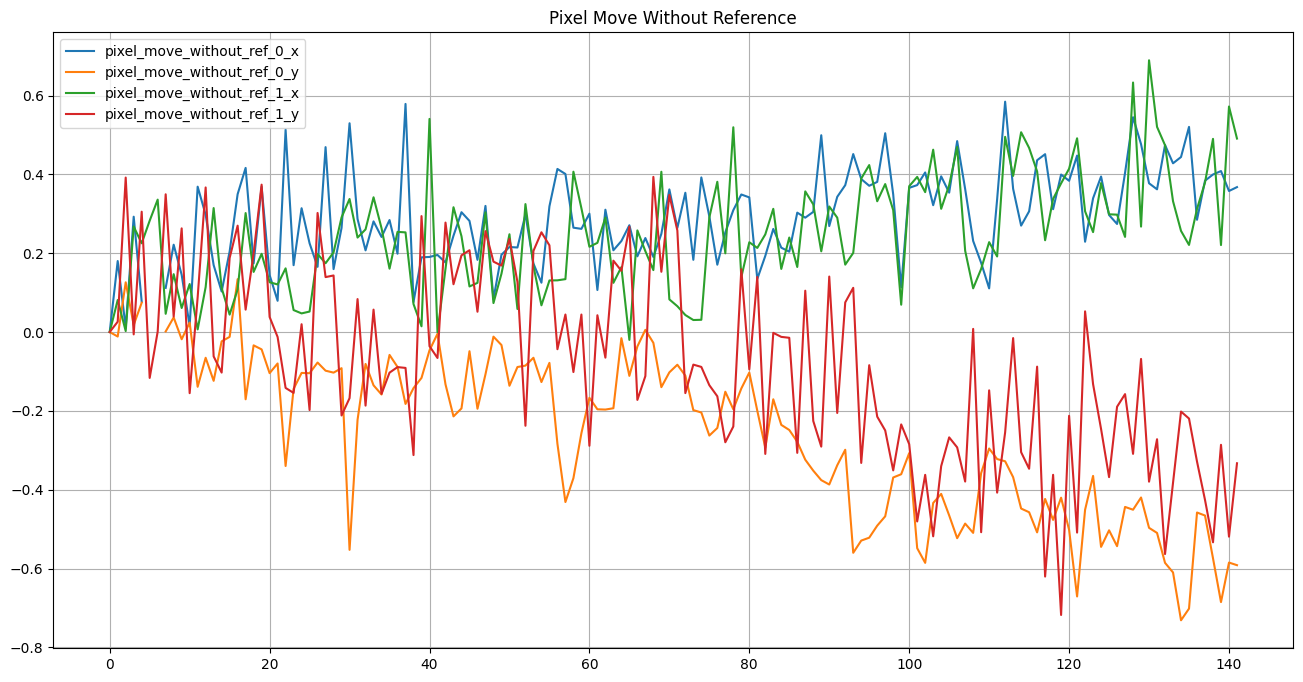

In [40]:
df[["pixel_move_without_ref_0_x", "pixel_move_without_ref_0_y", "pixel_move_without_ref_1_x", "pixel_move_without_ref_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Pixel Move Without Reference")

Text(0.5, 1.0, 'Real Move')

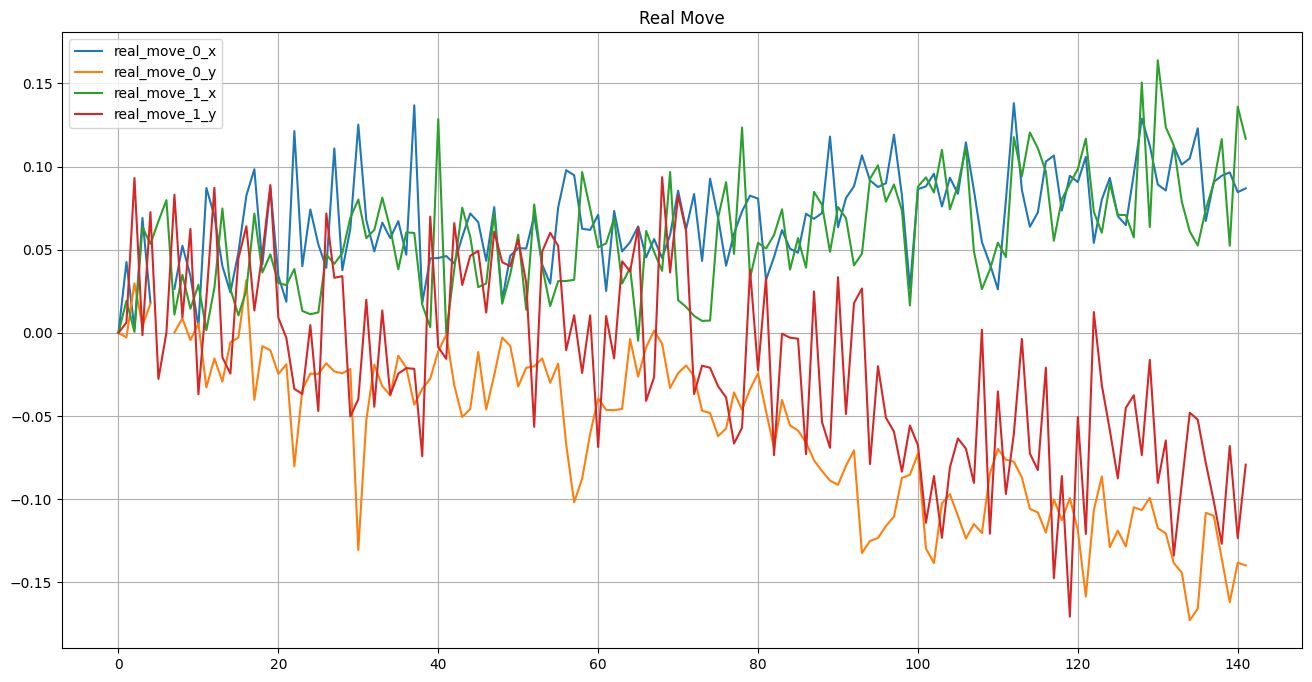

In [41]:
df[["real_move_0_x", "real_move_0_y", "real_move_1_x", "real_move_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Real Move")

Text(0.5, 1.0, 'Real Move Without Reference')

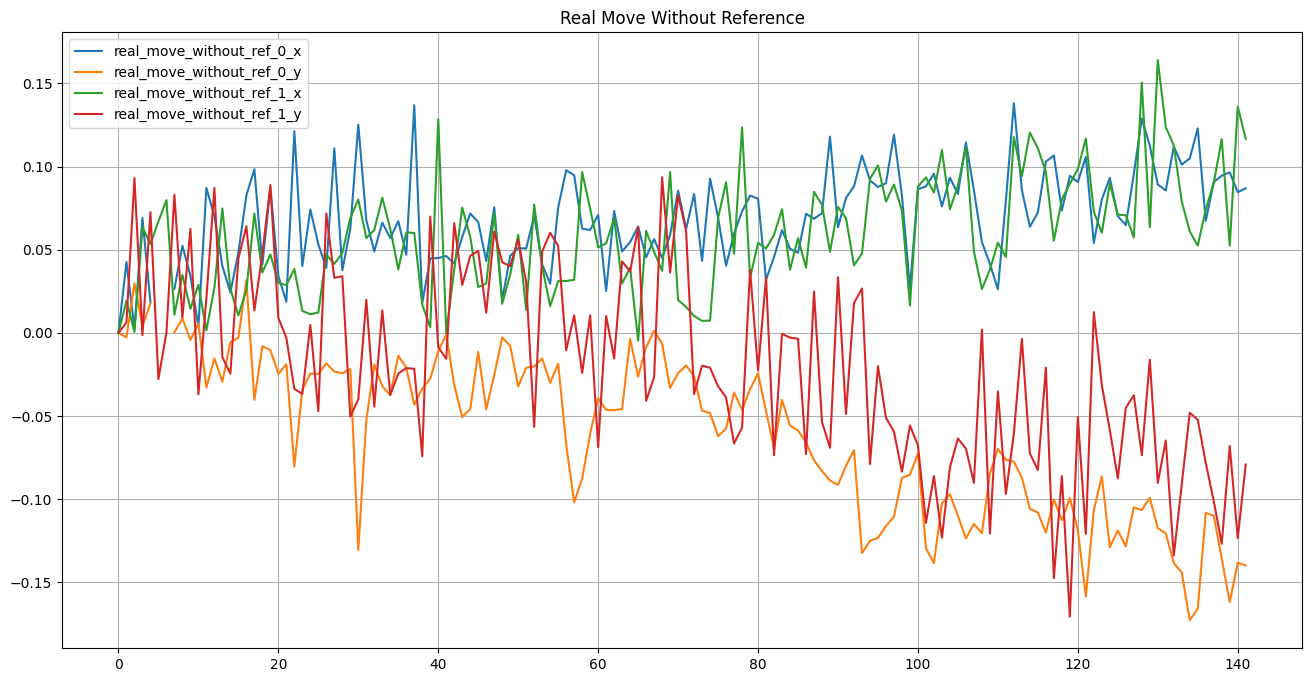

In [42]:
df[["real_move_without_ref_0_x", "real_move_without_ref_0_y", "real_move_without_ref_1_x", "real_move_without_ref_1_y"]].plot(figsize=(16, 8))
plt.grid()
plt.legend()
plt.title("Real Move Without Reference")